In [2]:
from data_functions import *

a = elo_induced_s(.4778,1.55)
b = elo_induced_s(.4762,1.14)

In [6]:
# find an example and plug in their serving stats

import sys
sys.path.insert(0,'/Users/jacobgollub/Desktop/college/research/pbp_explorations/scripts/sackmann')
import tennisGameProbability,tennisMatchProbability,tennisSetProbability,tennisTiebreakProbability
from tennisMatchProbability import matchProb
from helper_functions import enumerate_pbp_2, generate_df_2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

f_ij_1 = a[0]
f_ji_1 = a[1]
f_ij_2 = b[0]
f_ji_2 = b[1]
sub_string = 'SSSS;SSSS;SSSS;SSSS;SSSS;RRRR;S;'

In [4]:
import pandas as pd

df = pd.DataFrame([sub_string])
df.columns = [['pbp']]
df = generate_df_2(df,columns=[],final_set_extend=0)

df shape:  (25, 13)


In [5]:



#a = enumerate_pbp_2(sub_string,columns=[])


# get match_probs
m_probs1, m_probs2 = [0]*len(df),[0]*len(df)

for i,row in df.iterrows():
    if row['server']==0:
        m_probs1[i] = matchProb(f_ij_1,1-f_ji_1,mv=int(row['sets_0']),mw=int(row['sets_1']),sv=int(row['games_0']), \
                                sw=int(row['games_1']),gv=int(row['points_0']),gw=int(row['points_1']))
        m_probs2[i] = matchProb(f_ij_2,1-f_ji_2,mv=int(row['sets_0']),mw=int(row['sets_1']),sv=int(row['games_0']), \
                                sw=int(row['games_1']),gv=int(row['points_0']),gw=int(row['points_1']))
    else:
        m_probs1[i] = 1 - matchProb(f_ji_1,1-f_ij_1,mv=int(row['sets_1']),mw=int(row['sets_0']),sv=int(row['games_1']), \
                                sw=int(row['games_0']),gv=int(row['points_1']),gw=int(row['points_0']))
        m_probs2[i] = 1 - matchProb(f_ji_2,1-f_ij_2,mv=int(row['sets_1']),mw=int(row['sets_0']),sv=int(row['games_1']), \
                                sw=int(row['games_0']),gv=int(row['points_1']),gw=int(row['points_0']))

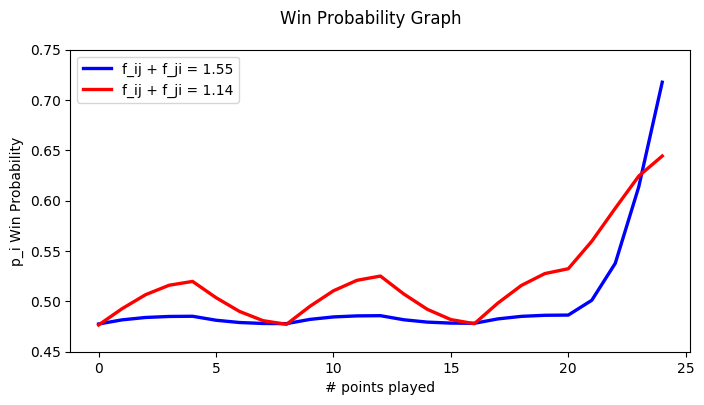

In [11]:
# graphically, try to compare different probabilities of different models

#match1 = df_pred[df_pred['match_id']==1]
m1_probs = m_probs1
m2_probs = m_probs2
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
l1 = ax.plot(np.arange(len(m1_probs)),m1_probs,'b-',linewidth=2.4)
l2 = ax.plot(np.arange(len(m2_probs)),m2_probs,'r-',linewidth=2.4)
fig.suptitle('Win Probability Graph')
ax.set_ylabel('p_i Win Probability')
ax.set_xlabel('# points played')
ax.set_ylim([.45,.75])
ax.legend([l1[0],l2[0]],['f_ij + f_ji = 1.55','f_ij + f_ji = 1.14'])
#plt.savefig('writing/photos/m12_wp')
fig.show()

In [23]:
p = .64
n = 10000
tau2 = 0.00176217195121
sigma2_i = np.array([p*(1-p)/(k) for k in range(1,n+1)])
B_i = sigma2_i/(tau2 + sigma2_i)

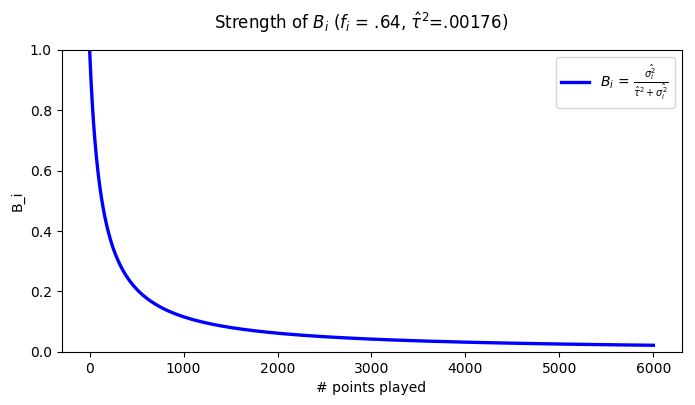

In [58]:
m1_probs = m_probs1
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
l1 = ax.plot(np.arange(1,n+1),B_i,'b-',linewidth=2.4)
fig.suptitle('Strength of ' r'$B_{i}$ ($f_{i}$ = .64, 'r'$\hat{\tau}^2$=.00176)')
ax.set_ylabel('B_i')
ax.set_xlabel('# points played')
ax.set_ylim([0,1])
ax.legend([l1[0]],[r'$B_{i}$ = $\frac{\hat{\sigma_i^2}}{\hat{\tau}^2+\hat{\sigma_i^2}}$'])
plt.savefig('writing/photos/norm_fig')
fig.show()

In [13]:
# m2_probs = m_probs2
# fig = plt.figure(figsize=(8,4))
# ax = fig.add_subplot(1,1,1)
# ax.plot(np.arange(len(m2_probs)),m2_probs,'b-',linewidth=2.4)
# fig.suptitle('Win Probability graph: f_ij + f_ji = 1.14')
# ax.set_ylabel('p_i win probability')
# ax.set_xlabel('# points played')
# ax.set_ylim([.45,.75])
# plt.savefig('writing/photos/m2_wp')
# fig.show()